In [13]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("../logs/cross_period_evaluation_results.csv")


#mean across seeds
avg_stats = (
    df.groupby(["train_year", "test_year"], as_index=False)[["accuracy", "f1_score", "auc"]]
    .mean()
)

#cross_accuracy = avg_stats[]

#standard deviation across seeds
std_stats = (
    df.groupby(["train_year", "test_year"])[["accuracy", "f1_score", "auc"]]
    .std()
)

#aggiungi test sullo stesso anno

Aggregating stats

In [26]:
cross_year_df = avg_stats.sort_values(by=['train_year', 'test_year'])

models = ["svm"]
base_dir = Path("models_avg_results")

for model in models:
    model_file = base_dir / f"tfidf_{model}_performance_avg.csv"
    df = pd.read_csv(model_file)
    avg_stats_same_year = df[["year", "accuracy"]]

same_year_df = pd.DataFrame({
    'train_year': avg_stats_same_year['year'],
    'test_year': avg_stats_same_year['year'],  # Use 'year' for both train and test
    'accuracy': avg_stats_same_year['accuracy'],
    'f1_score': np.nan,  # update with all the data if you want
    'auc': np.nan
})

final_df = pd.concat([cross_year_df, same_year_df], ignore_index=True).sort_values(by=["train_year", "test_year"])
print(final_df)


    train_year  test_year  accuracy  f1_score       auc
6           76         76  0.539267       NaN       NaN
0           76         77  0.538467  0.536967  0.554567
1           76         78  0.524900  0.521933  0.553500
2           77         76  0.600500  0.598233  0.654333
7           77         77  0.588933       NaN       NaN
3           77         78  0.524800  0.533800  0.589500
4           78         76  0.611433  0.614033  0.654767
5           78         77  0.582633  0.593300  0.614700
8           78         78  0.547367       NaN       NaN
9           79         79  0.573467       NaN       NaN
10          80         80  0.608433       NaN       NaN
11          81         81  0.588200       NaN       NaN
12          82         82  0.578833       NaN       NaN
13          83         83  0.531467       NaN       NaN
14          84         84  0.563100       NaN       NaN
15          85         85  0.567367       NaN       NaN
16          86         86  0.626400       NaN   

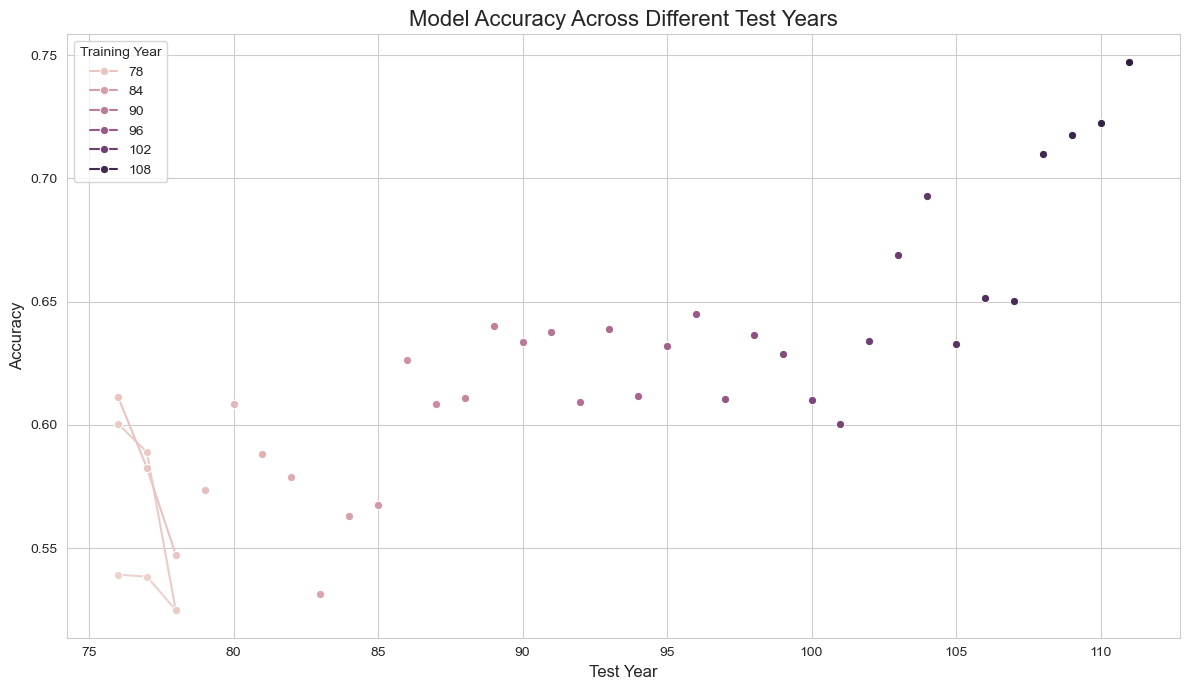

In [27]:

# Now, plot directly from your DataFrame
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

sns.lineplot(
    data=final_df,      #<-- Use your DataFrame here
    x='test_year',
    y='accuracy',
    hue='train_year',    #<-- This creates a line for each training year
    marker='o'
)

# Add titles and labels for clarity
plt.title('Model Accuracy Across Different Test Years', fontsize=16)
plt.xlabel('Test Year', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(title='Training Year')
plt.tight_layout()
plt.show()

